In [6]:
print("Hello World!")

Hello World!


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns
%matplotlib inline

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import kagglehub

In [9]:


# getting titanic dataset
path = kagglehub.dataset_download("yasserh/titanic-dataset")
print(path)


/home/gk/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


In [10]:

titanic_data=pd.read_csv(path+"/Titanic-Dataset.csv",index_col='PassengerId')
titanic_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [11]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
print(titanic_data.isnull().sum())
dataset_sample_size=titanic_data.shape[0]
print( "Dataset samples in total : ", dataset_sample_size)
print( "Missing cabin data :" , titanic_data['Cabin'].isnull().sum() *100/dataset_sample_size , "%")

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
Dataset samples in total :  891
Missing cabin data : 77.10437710437711 %


In [13]:
titanic_data_processed=titanic_data.drop(['Cabin','Ticket','Name'],axis=1,inplace=False)
print(titanic_data_processed)
print(titanic_data_processed['Embarked'].unique())
print(titanic_data_processed.isnull().sum())


             Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                                
1                   0       3    male  22.0      1      0   7.2500        S
2                   1       1  female  38.0      1      0  71.2833        C
3                   1       3  female  26.0      0      0   7.9250        S
4                   1       1  female  35.0      1      0  53.1000        S
5                   0       3    male  35.0      0      0   8.0500        S
...               ...     ...     ...   ...    ...    ...      ...      ...
887                 0       2    male  27.0      0      0  13.0000        S
888                 1       1  female  19.0      0      0  30.0000        S
889                 0       3  female   NaN      1      2  23.4500        S
890                 1       1    male  26.0      0      0  30.0000        C
891                 0       3    male  32.0      0      0   7.7500        Q

[891 rows x

In [14]:
titanic_data_processed.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [15]:
print(titanic_data_processed['Age'].mean())
print(titanic_data_processed['Age'].median())

29.69911764705882
28.0


In [16]:
titanic_data_processed['Age'].fillna(titanic_data_processed['Age'].mean(),inplace=True)
titanic_data_processed.dropna(how='any',inplace=True)
print(titanic_data_processed.isnull().sum())


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [17]:
titanic_data_processed.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [18]:
titanic_data_processed=pd.get_dummies(data=titanic_data_processed,columns=['Sex','Embarked'],dtype=int)
titanic_data_processed

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.000000,1,0,7.2500,0,1,0,0,1
2,1,1,38.000000,1,0,71.2833,1,0,1,0,0
3,1,3,26.000000,0,0,7.9250,1,0,0,0,1
4,1,1,35.000000,1,0,53.1000,1,0,0,0,1
5,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.000000,0,0,13.0000,0,1,0,0,1
888,1,1,19.000000,0,0,30.0000,1,0,0,0,1
889,0,3,29.699118,1,2,23.4500,1,0,0,0,1


In [19]:
# df= pd.DataFrame(np.array([[1, 2, 'A'], [2, 2, 'B'], [3, 3, 'C'], [4, 4, 'A']]), columns=['A', 'B', 'C'])


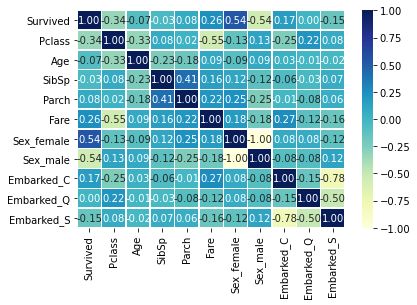

In [20]:
#1 Expoloring relationship between pairs using heatmap
correlation_matrix=titanic_data_processed.corr()
sns.heatmap(correlation_matrix, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
plt.show()

In [21]:
# #2 exploring pair realtionships using pairplot
# sns.pairplot(titanic_data_processed)
# plt.show()

In [22]:

# predicted_w,predicted_b,cost_history=gradient_descent_calc([],X_train,[],Y_train,alpha=0.2,error_margin=0.01,iterations=1000)
# plt.plot([i for i in range(len(cost_history))],cost_history,'b')
# plt.show()

In [23]:
# plt.figure(figsize=(10,6))
# sns.boxplot(x='Gender', y='Spending Score (1-100)', data=sales_data)
# plt.show()

In [24]:
# plt.figure(figsize=(10,6))
# sns.barplot(x='Profession', y='Spending Score (1-100)', data=sales_data)
# plt.show()

In [25]:
#One hot encoded gender data usuing pd.get_dummies()
# pd.get_dummies?
# new_sales=sales_data
# # new_sales_encoded = pd.get_dummies(data=new_sales, columns=['Gender'], prefix=['Male', 'Female'])
# new_sales_encoded = pd.get_dummies(data=new_sales, columns=['Gender'],prefix='Gender')
# new_sales_encoded

In [26]:
# # One hot encoded gender data manually
# new_sales=sales_data.copy()
# new_sales['male']=np.where(new_sales['Gender']=='Male',1,0)
# new_sales['female']=np.where(new_sales['Gender']=='Female',1,0)
# new_sales=new_sales.drop('Gender',axis=1)
# numeric_sales_data=new_sales.drop('Profession',axis=1)
# numeric_sales_data


In [27]:
# configured_sales_data=numeric_sales_data[numeric_sales_data.columns[numeric_sales_data.columns != 'Spending Score (1-100)']]

# spending_score=sales_data[['Spending Score (1-100)']]


# #standardized values for training
# selected_sales=configured_sales_data.copy()
# X_mean=(selected_sales.mean())
# X_std=selected_sales.std()
# X_standardized=(selected_sales-X_mean)/X_std

# #transforming into numpy
# X=X_standardized.to_numpy()
# y=spending_score.to_numpy()
# y=y.reshape(-1)




In [28]:
# w,b,cost_history=gradient_descent_calc(X=X_train,Y=Y_train,alpha=0.1,error_margin=0.5,iterations=1000,W=[],b=[])
# cost_history

In [29]:

def train_linear_regression_sk(X,y,degree):
    cv_train_test=[]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    for degree in range(1,degree+1):


        poly=PolynomialFeatures(degree)
        X_poly_train=poly.fit_transform(X_train)
        X_poly_test=poly.fit_transform(X_test)
        model=LinearRegression()

        cv_scores = cross_val_score(model, X_poly_train, y_train, cv=5, scoring='neg_mean_squared_error')
        avg_cv_score = -np.mean(cv_scores)  

        model.fit(X_poly_train,y_train)

        y_predict=model.predict(X_poly_test)
        test_mse=mean_squared_error(y_test,y_predict)
        cv_train_test.append((avg_cv_score,test_mse))


        print(f"Degree: {degree}")
        print(f"  Cross-Validation MSE: {avg_cv_score:.2f}")
        print(f"  Test MSE: {test_mse:.2f}")
    return cv_train_test,model

In [30]:
def plot_cv(cv_train_test, degree):
    plt.plot([i + 1 for i in range(degree)], [cv_train for (cv_train, cv_test) in cv_train_test])
    plt.plot([i + 1 for i in range(degree)], [cv_test for (cv_train, cv_test) in cv_train_test])
    plt.xlabel('Polynomial Degree')
    plt.ylabel('Mean Squared Error')
    plt.legend(['CV MSE', 'Test MSE'])
    plt.show()


In [31]:
def train_test_split_sk(X,y,size=0.2,random_state=42):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    return X_train,X_test,y_train,y_test



In [32]:
def train_logistic_regression_sk(X_train,X_test,y_train,y_test,degree):
    
    poly=PolynomialFeatures(degree)
    X_poly_train=poly.fit_transform(X_train)
    X_poly_test=poly.fit_transform(X_test)
    model = LogisticRegression(solver='liblinear', max_iter=100,C=10)

    
    cv_train_test=[]
    
    cv_scores = cross_val_score(model, X_poly_train, y_train, cv=5, scoring='neg_mean_squared_error')
    avg_cv_score = -np.mean(cv_scores)  

    model.fit(X_poly_train,y_train)
    print("Logistic Regression Model Trained")
        
    return model,avg_cv_score,X_poly_test

In [33]:
def test_logistic_regression_sk(model,X_poly_test,y_test):
    
    y_predict=model.predict(X_poly_test)
    test_mse=mean_squared_error(y_test,y_predict)
    
  
    return test_mse

In [34]:

X_titanic=titanic_data_processed.drop('Survived',axis=1).to_numpy()
Y_titanic=titanic_data_processed['Survived'].to_numpy()

scaler = StandardScaler()
X_titanic_scaled = scaler.fit_transform(X_titanic)

In [35]:
degree=5
titanicX_train,titanicX_test,titanicY_train,titanicY_test=train_test_split_sk(X_titanic_scaled,Y_titanic)
models=[]
cv_scores=[]
for i in range(1,degree+1):
    trained_model,cv_score,X_poly_test=train_logistic_regression_sk(titanicX_train,titanicX_test,titanicY_train,titanicY_test,degree)
    test_mse_value=test_logistic_regression_sk(trained_model,X_poly_test,titanicY_test)
    cv_scores.append((cv_score,test_mse_value))
    models.append(trained_model)
plot_cv(cv_scores,degree)

/home/gk/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


KeyboardInterrupt: 